In [30]:
# Imports
import torch
# import jovian
import torchvision
import string
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import os
import cv2
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, classification_report

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import linear_model
df = pd.read_excel("numerical_chestxray_values.xlsx")

In [2]:
#Mean Absolute Error closer to 0 the better
#Mean Squared Error closer to 0 the better
#R-squared closer to 1 the better

In [12]:
#Splitting Dataset
x = df.drop(columns = "Label")
y = df["Label"]
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Finding the ideal Threshold to use

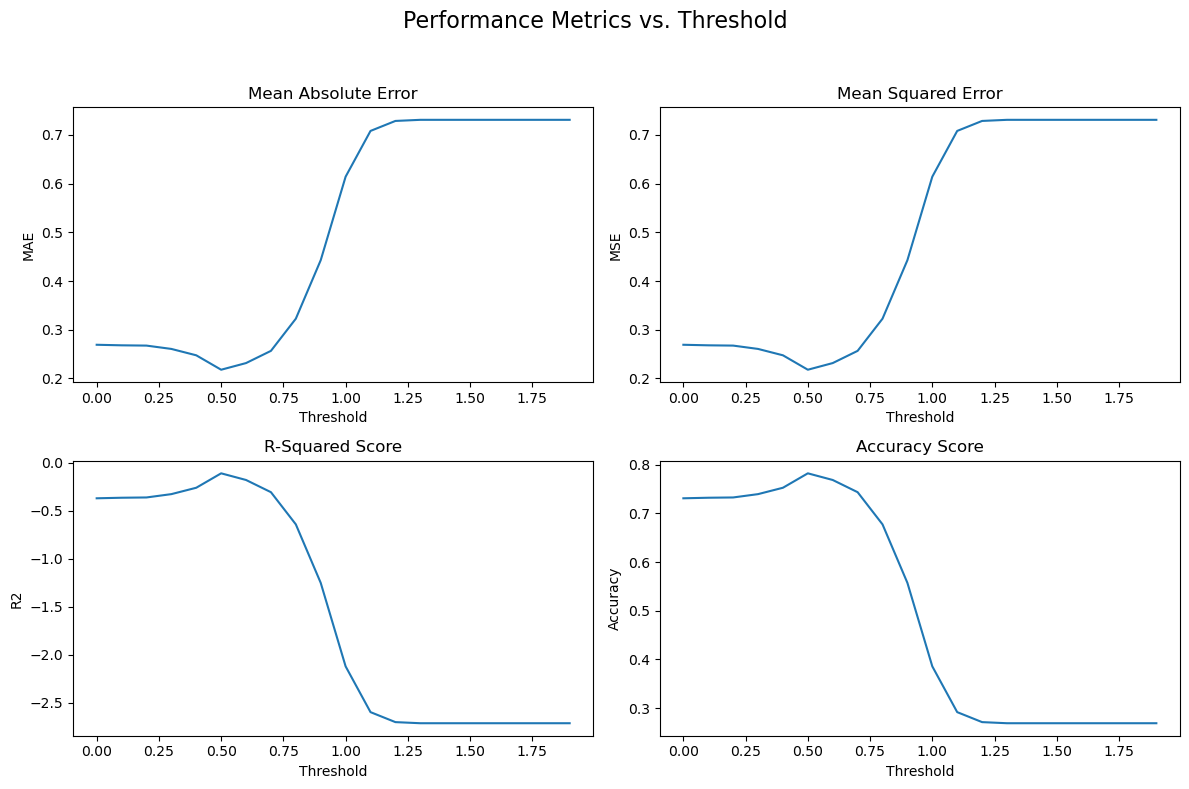

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

def stats(x, y_, X_test, y_test, threshold):
    lr = LinearRegression()
    lr.fit(x, y_)
    y = lr.predict(x)

    y = np.where(y > threshold, 1, 0)
    
    y_pred_test = lr.predict(X_test)

    y_pred_test = np.where(y_pred_test > threshold, 1, 0)
    
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    
    return mae, mse, r2, accuracy

thresholds = [x / 10 for x in range(0, 20)]
mae_scores = []
mse_scores = []
r2_scores = []
accuracy_scores = []

for threshold in thresholds:
    mae, mse, r2, accuracy = stats(X_train, y_train, X_test, y_test, threshold)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    accuracy_scores.append(accuracy)

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Performance Metrics vs. Threshold', fontsize=16)

axes[0, 0].plot(thresholds, mae_scores)
axes[0, 0].set_title('Mean Absolute Error')
axes[0, 0].set_xlabel('Threshold')
axes[0, 0].set_ylabel('MAE')

axes[0, 1].plot(thresholds, mse_scores)
axes[0, 1].set_title('Mean Squared Error')
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('MSE')

axes[1, 0].plot(thresholds, r2_scores)
axes[1, 0].set_title('R-Squared Score')
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('R2')

axes[1, 1].plot(thresholds, accuracy_scores)
axes[1, 1].set_title('Accuracy Score')
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('Accuracy')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Mean Absolute Error (MAE):

When the threshold is set at 0.5, the MAE represents the average absolute difference between the actual class labels and the predicted labels.
A lower MAE indicates that, on average, the model's predictions are closer to the true labels.
The choice of threshold at 0.5 minimizes the MAE, suggesting that the model's predictions are most accurate at this point.

### Mean Squared Error (MSE):

MSE measures the average squared difference between the actual and predicted labels.
A lower MSE means that the model's predictions are closer to the true labels, with smaller errors.
The threshold of 0.5 minimizes the MSE, indicating that the model's predictions are more accurate and have smaller squared errors at this threshold.

### R-squared (R2) Score:

R2 measures the proportion of the variance in the dependent variable that is explained by the independent variables.
A higher R2 score suggests that a larger proportion of the variance is explained by the model, indicating a better fit.
The R2 score is likely maximized at the threshold of 0.5, meaning that the model explains the most variance in the data at this threshold.

### Accuracy Score:

Accuracy measures the proportion of correctly predicted instances out of the total instances.
A higher accuracy indicates a greater proportion of correct predictions.
The threshold of 0.5 maximizes the accuracy score, meaning that the model's predictions are most in agreement with the true labels at this threshold.


In summary, a threshold of 0.5 is considered optimal based on these evaluation metrics because it leads to the model's predictions having the smallest errors (as indicated by lower MAE and MSE), explaining the most variance in the data (as indicated by higher R2), and achieving the highest proportion of correct predictions (as indicated by higher accuracy). It is a balance point where the model performs well across multiple metrics, making it a reasonable choice for binary classification tasks.

# Training Model

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Finding Intercepts and Coefficients

In [14]:
#Finding the intercept and coefficients
intercept = lr.intercept_
c = lr.coef_
print(intercept,c)

2.634912372411036 [-0.00965513  0.0085798  -0.55771513 -0.07724907 -0.00090466 -0.85969447
 -0.03381482]


The intercept value of 2.634 indicates to us that wehn all the independent variables are set to 0, the model predicts a relatively high odds of Pneumonia. 


The coefficient of the independent variables indicate the strength and direction of the variable's influence on the prediction. As we can see most of the coefficients are relatively close to 0, this indicates that the model does not rely heavily on these variables for making the prediction and they have little impact on the results.

In [15]:
#Predicting using training dataset
y_pred_train = lr.predict(X_train)

threshold = 0.5
y_pred_train = np.where(y_pred_train > threshold, 1, 0)



In [27]:
#Metrics for training set
print("Mean Absolute Error for training set is:",mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error for training set is:",mean_squared_error(y_train, y_pred_train))
print("R-Squared score for training set is:",r2_score(y_train,y_pred_train))
print("The accuracy score for the training set is:", accuracy_score(y_train,y_pred_train))

Mean Absolute Error for training set is: 0.22224932910465967
Mean Squared Error for training set is: 0.22224932910465967
R-Squared score for training set is: -0.12550492948619363
The accuracy score for the training set is: 0.7777506708953403


The negative R2 Score suggests that there may be issues the the model's fit to the data we are using, we will see the results of the test set and make a conclusion of the appropriateness of the model.

In [31]:
cr = classification_report(y_train, y_pred_train)
cm = confusion_matrix(y_train,y_pred_train)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.62      0.45      0.52      1110
           1       0.81      0.90      0.86      2989

    accuracy                           0.78      4099
   macro avg       0.72      0.67      0.69      4099
weighted avg       0.76      0.78      0.77      4099

[[ 499  611]
 [ 300 2689]]


The model appears to perform significantly better for class 1 (label 1) than for class 0 (label 0) in terms of precision, recall, and F1-score. This suggests that the model is better at identifying and classifying instances of class 1.

The high recall for class 1 indicates that the model effectively identifies the majority of actual positive instances.

The F1-score for class 1 is relatively high, suggesting a good balance between precision and recall.

The lower precision, recall, and F1-score for class 0 indicate that the model struggles to correctly classify class 0 instances, which is reflected in the higher number of false negatives in the confusion matrix.

In [33]:
#Using the test data
y_pred_test = lr.predict(X_test)

threshold = 0.5
y_pred_test = np.where(y_pred_test > threshold, 1, 0)

In [34]:
#Metrics for testing set
print("Mean Absolute Error for test set is:",mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error for test set is:",mean_squared_error(y_test, y_pred_test))
print("R-Squared score for test set is:",r2_score(y_test, y_pred_test))

Mean Absolute Error for test set is: 0.21798520204894706
Mean Squared Error for test set is: 0.21798520204894706
R-Squared score for test set is: -0.10801176292373871


Although the R2 Score has become less negative, it is still a negative value nontheless. There are a few possible reasons why the model encounters issue fitting to the data:

1) Multilinear regression predicts continuous numeric values, which can fall outside the binary classification range of [0, 1]. This can result in predictions that do not correspond to the binary class labels, making the output difficult to interpret.

2) Binary classification problems often involve non-linear decision boundaries that separate the two classes. Multilinear regression assumes a linear relationship between independent variables and the dependent variable. Attempting to fit a linear model to non-linear data can lead to poor model performance.

In [35]:
#Classification Report and Confusion Matrix for normal mlr
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

cr = classification_report(y_test, y_pred_test)
cm = confusion_matrix(y_test,y_pred_test)
print(accuracy_score(y_test,y_pred_test))
print(cr)
print(cm)

0.7820147979510529
              precision    recall  f1-score   support

           0       0.63      0.46      0.53       473
           1       0.82      0.90      0.86      1284

    accuracy                           0.78      1757
   macro avg       0.72      0.68      0.70      1757
weighted avg       0.77      0.78      0.77      1757

[[ 218  255]
 [ 128 1156]]


# Overfitting?

Since there is not much improvement in the evaluation metrics from the training and test set, there might be a possibility of overfitting. To tackle this problem we can make use of Lasso and Ridge Regression to attempt to improve our results (if overfitting is present)

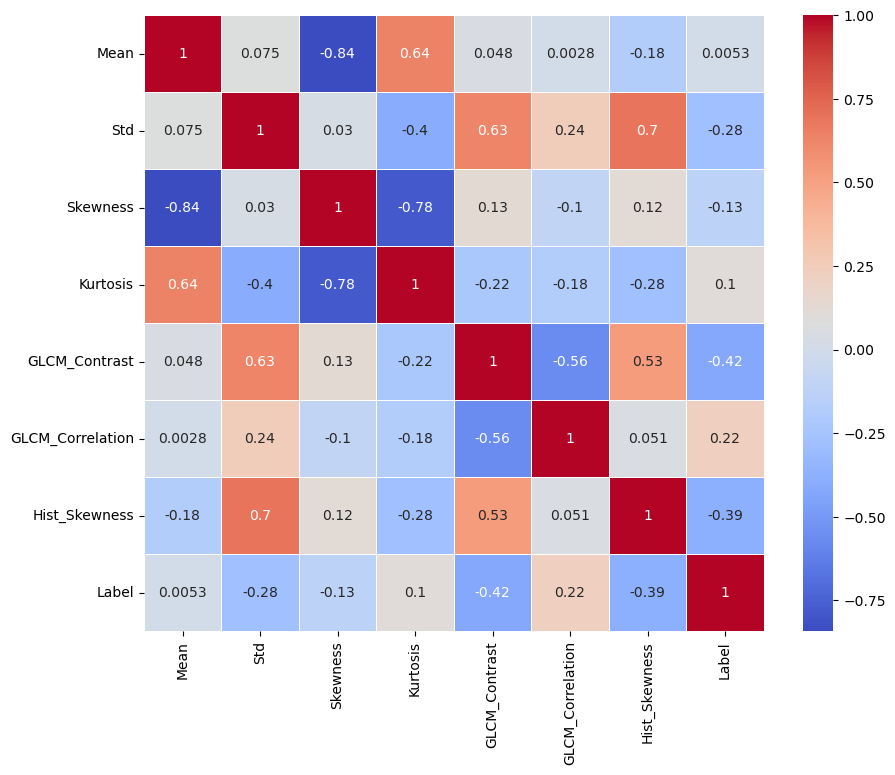

In [36]:
import seaborn as sns
# Create correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

As we can see from the correlation matrix, there are no outstanding colinearity between any variables used, thus Ridge will not be applicable.

Since we do not know if any of the variables are redundant to the model, it is worth to use Lasso Regression and see the results.


In [42]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [43]:
#Finding the intercept and coefficients
intercept_lasso = lasso.intercept_
c_lasso = lasso.coef_
print(intercept_lasso,c_lasso)

1.1002329630595842 [-0.00013969  0.00238746 -0.          0.         -0.00108822  0.
 -0.01626564]


In [44]:
#Predicting using training dataset
y_pred_train_lasso = lasso.predict(X_train)
y_pred_train_lasso = np.where(y_pred_train_lasso > threshold, 1, 0)

In [45]:
#Metrics for Lasso Training set
print("Mean Absolute Error for Lasso training set is:",mean_absolute_error(y_train, y_pred_train_lasso))
print("Mean Squared Error for Lasso training set is:",mean_squared_error(y_train, y_pred_train_lasso))
print("R-Squared score for Lasso training set is:",r2_score(y_train, y_pred_train_lasso))

Mean Absolute Error for Lasso training set is: 0.2583556965113442
Mean Squared Error for Lasso training set is: 0.2583556965113442
R-Squared score for Lasso training set is: -0.30835315074190905


In [46]:
#Predicting using testing dataset
y_pred_test_lasso = lasso.predict(X_test)
y_pred_test_lasso = np.where(y_pred_test_lasso > threshold, 1, 0)

In [47]:
#Metrics for Lasso testing set
print("Mean Absolute Error for Lasso test set is:",mean_absolute_error(y_test, y_pred_test_lasso))
print("Mean Squared Error for Lasso test set is:",mean_squared_error(y_test, y_pred_test_lasso))
print("R-Squared score for Lasso test set is:",r2_score(y_test, y_pred_test_lasso))

Mean Absolute Error for Lasso test set is: 0.26920887877063177
Mean Squared Error for Lasso test set is: 0.26920887877063177
R-Squared score for Lasso test set is: -0.36838006230529596


In [48]:
cr_lasso = classification_report(y_test, y_pred_test_lasso)
cm_lasso = confusion_matrix(y_test,y_pred_test_lasso)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.63      0.46      0.53       473
           1       0.82      0.90      0.86      1284

    accuracy                           0.78      1757
   macro avg       0.72      0.68      0.70      1757
weighted avg       0.77      0.78      0.77      1757

[[ 218  255]
 [ 128 1156]]


As we can see the results does not differ by much compared to our original model.

# Conclusion
Based on the results of the model above, we can see that Multilinear Regression is not an optimal technique to use for Binary Classification. There are numerous limitations held by this technique that in theory makes it understandable for why it would not work. Other than the two we have mentioned above, there are other theories such as: 

1) Violation of Regression Assumptions: Binary classification problems frequently exhibit characteristics such as heteroscedasticity, non-normality of residuals, and non-constant error variance, which do not align with the assumptions of multilinear regression. 

2) Inappropriate Loss Function: Multilinear regression uses the least squares loss function, which is not designed for binary classification. It is sensitive to outliers and does not provide a suitable measure of model fit for this task. 


3) Overfitting and Underfitting: Multilinear regression lacks built-in mechanisms for preventing overfitting, which is a common concern in binary classification. It may also be prone to underfitting due to the linearity assumption, leading to poor predictive performance.